In [2]:
""" #For colab
!pip install \
'git+https://github.com/facebookresearch/segment-anything.git'
!pip install -q roboflow supervision
!wget -q \
'https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth'
"""

" #For colab\n!pip install 'git+https://github.com/facebookresearch/segment-anything.git'\n!pip install -q roboflow supervision\n!wget -q 'https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth'\n"

In [3]:
import torch
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [4]:
torch.cuda.is_available()

True

In [5]:
DEVICE = torch.device("cpu")
#DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
#DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
cfg_inst = get_cfg()
cfg_inst.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg_inst.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.2  # set threshold for this model
# Find a model from detectron2's model zoo.  https://github.com/facebookresearch/detectron2/blob/main/MODEL_ZOO.md
cfg_inst.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg_inst)


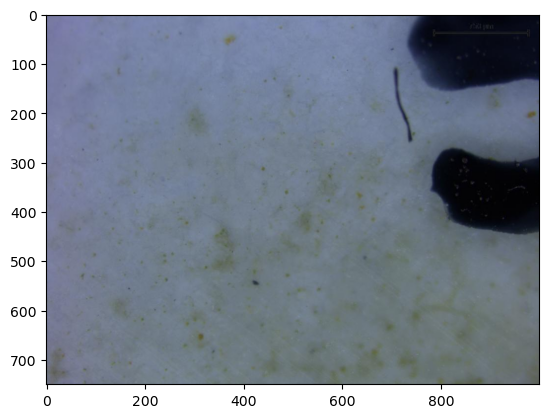

In [7]:
import cv2
from matplotlib import pyplot as plt

image_bgr = cv2.imread("fibras_low_res_all/2.jpg")
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

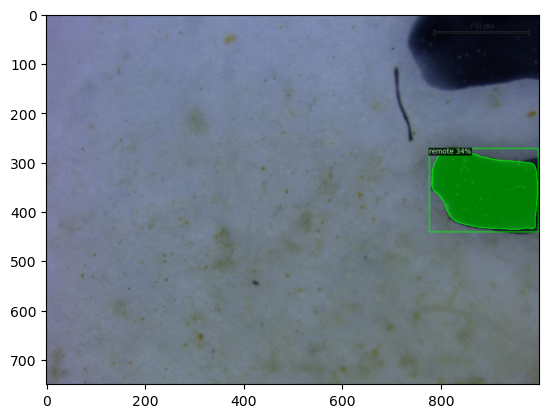

In [8]:
outputs = predictor(image_rgb)

v = Visualizer(image_rgb[:, :, ::-1], MetadataCatalog.get(cfg_inst.DATASETS.TRAIN[0]), scale=1.0)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image()[:, :, ::-1])

In [23]:
print(len(outputs["instances"].pred_boxes.tensor))
print(outputs["instances"].pred_masks[0])
x,y,w,h = outputs["instances"].pred_boxes.tensor.tolist()[0]
print(x,y,w,h)

1
tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]], device='cuda:0')
777.3867797851562 271.7610168457031 997.5380859375 441.1966247558594


(750, 1000)


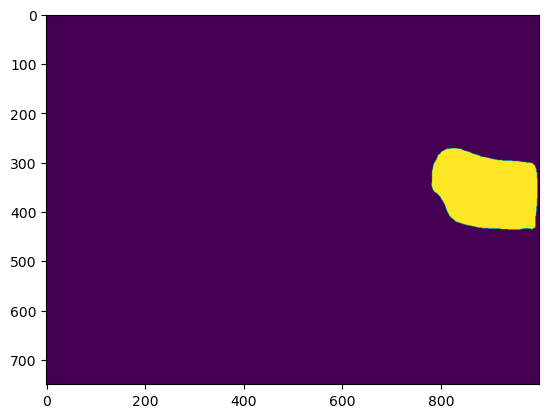

In [10]:
seg_mask = outputs["instances"].pred_masks[0].to("cpu").numpy()
print(seg_mask.shape)
plt.imshow(seg_mask)

In [11]:
#plt.imshow(mask[1]['segmentation'].astype(int)*255)

In [12]:
#print(mask[1]['bbox'])

In [13]:
import numpy as np

def draw_masks_fromDict(image, masks_generated) :
  masked_image = image.copy()
  for i in range(len(masks_generated)) :
    masked_image = np.where(np.repeat(masks_generated[i]['segmentation'].astype(int)[:, :, np.newaxis], 3, axis=2),
                            np.random.choice(range(256), size=3),
                            masked_image)

    masked_image = masked_image.astype(np.uint8)

  return cv2.addWeighted(image, 0.3, masked_image, 0.7, 0)

In [14]:
#segmented_image = draw_masks_fromDict(image_rgb, mask)

#plt.imshow(segmented_image, cmap='gray')

In [15]:
"""
n_mask = len(mask)

for n in n_mask:
    cv2.imwrite("masks/mask_{}.png".format(n), mask[n]['segmentation'].astype(int)*255)
"""

'\nn_mask = len(mask)\n\nfor n in n_mask:\n    cv2.imwrite("masks/mask_{}.png".format(n), mask[n][\'segmentation\'].astype(int)*255)\n'

In [16]:
"""
from PIL import Image
import os

images = []
for file in os.listdir("ejemplos_fibras"):
    if file.endswith(".jpg"):
        images.append(Image.open(os.path.join("ejemplos_fibras", file)))

import random
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    axs[i].imshow(np.array(images[random.randint(0, len(images))]))
    axs[i].axis("off")
"""

'\nfrom PIL import Image\nimport os\n\nimages = []\nfor file in os.listdir("ejemplos_fibras"):\n    if file.endswith(".jpg"):\n        images.append(Image.open(os.path.join("ejemplos_fibras", file)))\n\nimport random\nimport matplotlib.pyplot as plt\nimport numpy as np\n\nfig, axs = plt.subplots(1, 3, figsize=(15, 5))\nfor i in range(3):\n    axs[i].imshow(np.array(images[random.randint(0, len(images))]))\n    axs[i].axis("off")\n'